# DAI-101 Assignment-1

# DATA EXTRACTION

### Import statements 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Ignoring Warnings

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [8]:
data = pd.read_csv('adult.csv')

#### Description of Dataset :

The `final_weight` column represents population weights from the Census Bureau's Current Population Survey (CPS). These weights adjust for population estimates based on age, sex, race, and Hispanic origin across states. The weighting process uses three sets of controls (population 16+ per state, Hispanic origin by age and sex, and race by age and sex) and is iterated to ensure accuracy. People with similar demographic characteristics have similar weights, though this holds true within individual state samples due to varying selection probabilities. 

In [10]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
data['workclass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: workclass
Non-Null Count  Dtype 
--------------  ----- 
32561 non-null  object
dtypes: object(1)
memory usage: 254.5+ KB


In [13]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [14]:
unique_values = data['workclass'].unique()
print(unique_values)

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']


# DATA CLEANING

In [16]:
#replacing the '?' with Null Values 'NaN'
data.replace('?', np.nan, inplace=True)

In [17]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [18]:
#Checking the number of missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
#extracting the duplicate rows
data[data.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [21]:
# dropping the duplicate rows
data.drop_duplicates(inplace=True)

In [22]:
#dropping the capital.gain column because it mostly has value '0'
data.drop('capital.gain', axis=1, inplace=True)

In [23]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K


In [24]:
data.shape

(32537, 14)

Checking if every categorical column has a correct data-type

In [26]:
# Identifying categorical columns i.e. columns with 'object' data type
categorical_columns = data.select_dtypes(include=['object']).columns

# Making a for loop through each categorical column and print its name and data type
for col in categorical_columns:
    print(f'Column: {col}, Data Type: {data[col].dtype}')

Column: workclass, Data Type: object
Column: education, Data Type: object
Column: marital.status, Data Type: object
Column: occupation, Data Type: object
Column: relationship, Data Type: object
Column: race, Data Type: object
Column: sex, Data Type: object
Column: native.country, Data Type: object
Column: income, Data Type: object


Hence, every categorical column has correct data-type

Now, Checking if every numerical column has correct data-type

In [29]:
# Identifying numerical columns i.e. columns with int64 or float64 data types)
numerical_columns = data.select_dtypes(include=['int64']).columns

# Making a for loop through each numerical column and print its name and data type
for col in numerical_columns:
    print(f'Column: {col}, Data Type: {data[col].dtype}')

Column: age, Data Type: int64
Column: fnlwgt, Data Type: int64
Column: education.num, Data Type: int64
Column: capital.loss, Data Type: int64
Column: hours.per.week, Data Type: int64


Hence, every numerical column has correct data-type

Renaming columns for better visualization

In [32]:
# Renaming columns to be more consistent and readable
data.rename(columns={
    'fnlwgt': 'final_weight',
    'education.num': 'education_num',
    'marital.status': 'marital_status',
    'capital.gain': 'capital_gain',
    'capital.loss': 'capital_loss',
    'hours.per.week': 'hours_per_week',
    'native.country': 'native_country'
}, inplace=True)

# Displaying the updated DataFrame : data
data.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,3900,40,United-States,<=50K


## Handling the missing values

1) For categorical columns

In [35]:
# Identifying categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Replacing missing values with the mode for each categorical column
for col in categorical_columns:
    mode_value = data[col].mode()[0]  
    data[col].fillna(mode_value, inplace=True)

# Displaying the updated DataFrame to verify changes
data[categorical_columns].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Now all the missing values of categorical columns are filled

2. For numerical columns

In [38]:
# Identifying numerical columns
numerical_columns = data.select_dtypes(include=['int64']).columns

# Replacing missing values with the mean for each numerical column
for col in numerical_columns:
    mean_value = data[col].mean()  
    data[col].fillna(mean_value, inplace=True)  

# Displaying the updated DataFrame to verify changes
data[numerical_columns].isnull().sum()  

age               0
final_weight      0
education_num     0
capital_loss      0
hours_per_week    0
dtype: int64

Now, all missing values of numerical columns are filled

# EXPLORATORY DATA ANALYSIS

## 1. Univariate Analysis

### i. Categorical Variables

Count plot

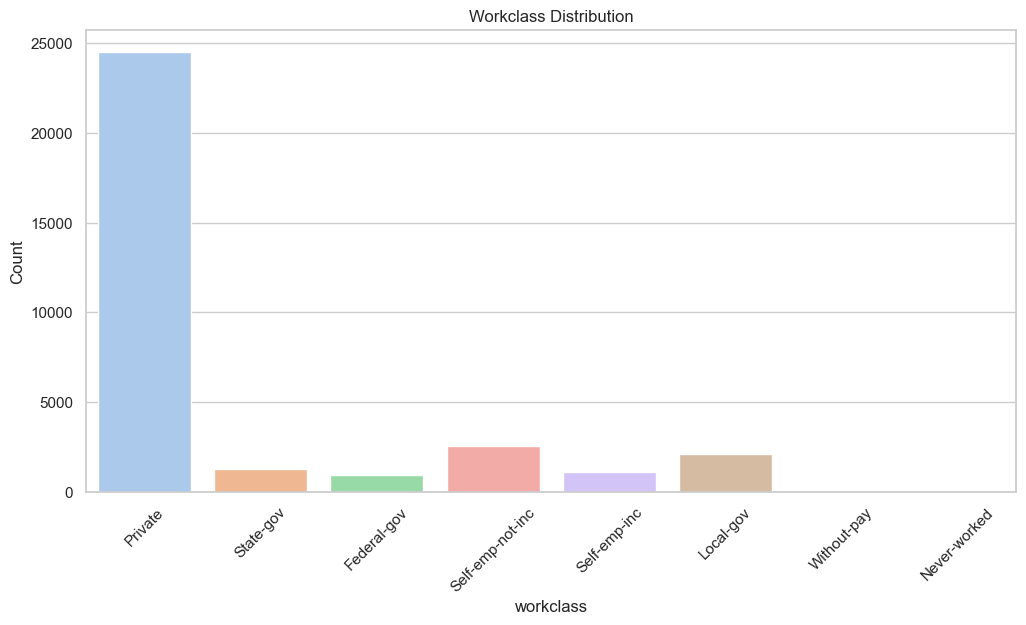

In [44]:
# Count Plot for 'workclass' column
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='workclass', palette='pastel')
plt.title('Workclass Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

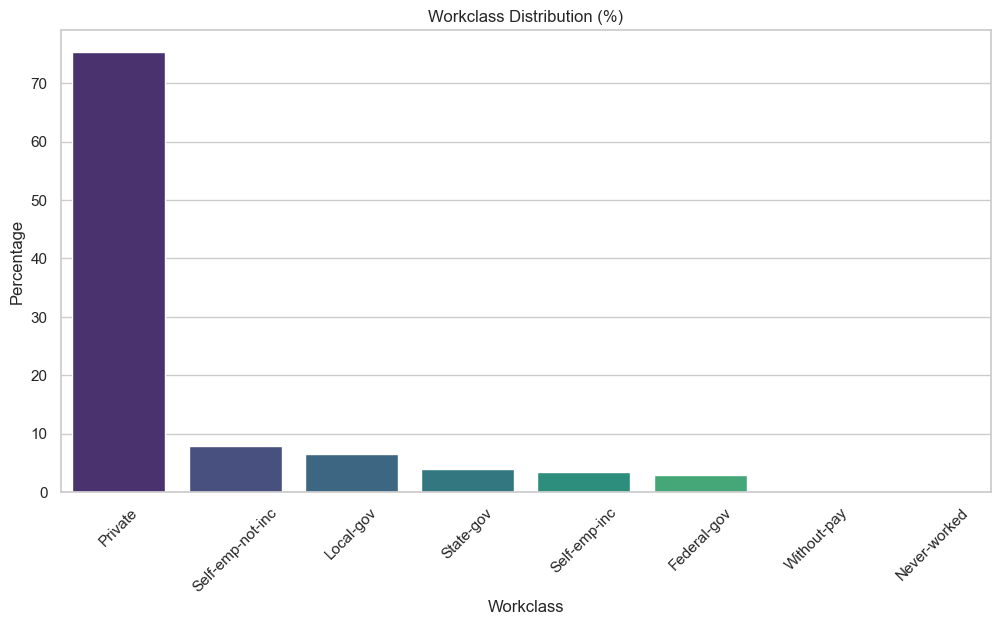

In [45]:
# Count Percentage for 'workclass' column
workclass_counts = data['workclass'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')
plt.title('Workclass Distribution (%)')
plt.xlabel('Workclass')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

Pie Chart

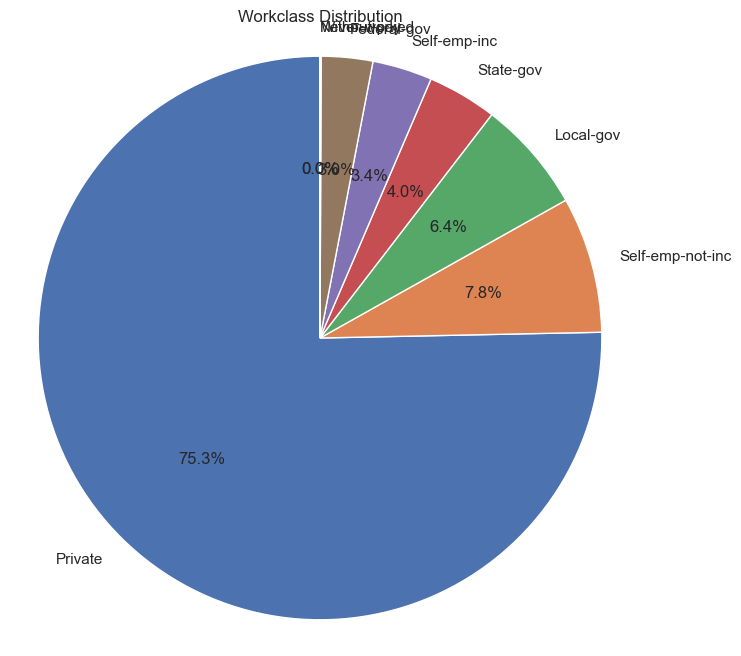

In [47]:
# Pie Chart for 'workclass' Distribution
workclass_counts = data['workclass'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(workclass_counts, labels=workclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Workclass Distribution')
plt.axis('equal')
plt.show()

### ii) Numerical Variables

In [49]:
# Descriptive Statistics for Age
print("Descriptive Statistics for Age:")
print(f"Min: {data['age'].min()}")
print(f"Max: {data['age'].max()}")
print(f"Mean: {data['age'].mean()}")
print(f"Median: {data['age'].median()}")
print(f"Mode: {data['age'].mode()[0]}")
print(f"Range: {data['age'].max() - data['age'].min()}")
print(f"Variance: {data['age'].var()}")
print(f"Standard Deviation: {data['age'].std()}")

Descriptive Statistics for Age:
Min: 17
Max: 90
Mean: 38.585548759873376
Median: 37.0
Mode: 36
Range: 73
Variance: 185.99459445005664
Standard Deviation: 13.6379835184699


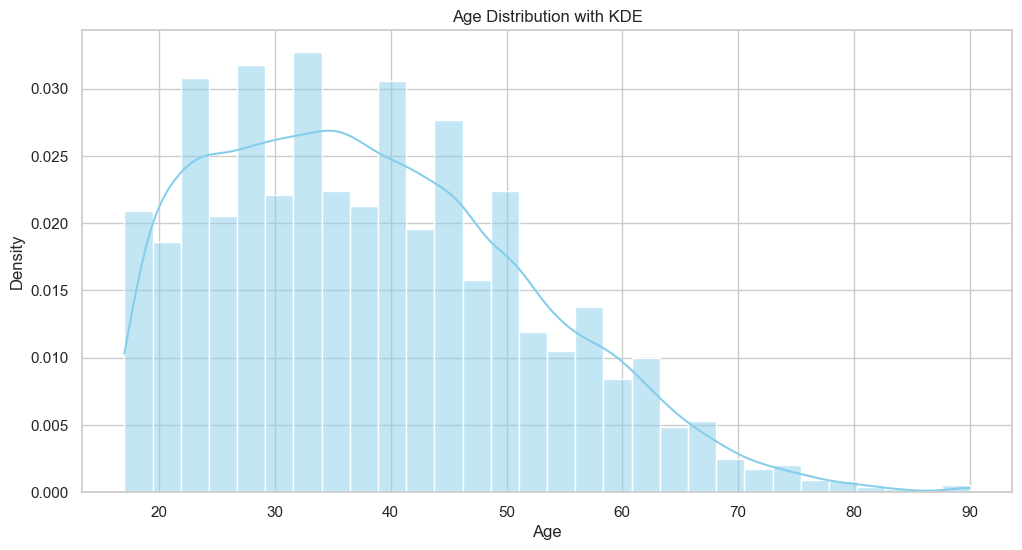

In [50]:
# Histogram and KDE for Age
plt.figure(figsize=(12, 6))
sns.histplot(data=data['age'], bins=30, kde=True, color='skyblue', stat="density")
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### For final_weight column

In [52]:
# Descriptive Statistics for final_weight
print("Descriptive Statistics for Final Weight:")
print(f"Min: {data['final_weight'].min()}")
print(f"Max: {data['final_weight'].max()}")
print(f"Mean: {data['final_weight'].mean()}")
print(f"Median: {data['final_weight'].median()}")
print(f"Mode: {data['final_weight'].mode()[0]}")
print(f"Range: {data['final_weight'].max() - data['age'].min()}")
print(f"Variance: {data['final_weight'].var()}")
print(f"Standard Deviation: {data['final_weight'].std()}")

Descriptive Statistics for Final Weight:
Min: 12285
Max: 1484705
Mean: 189780.84851092604
Median: 178356.0
Mode: 123011
Range: 1484688
Variance: 11142168571.978058
Standard Deviation: 105556.47100949357


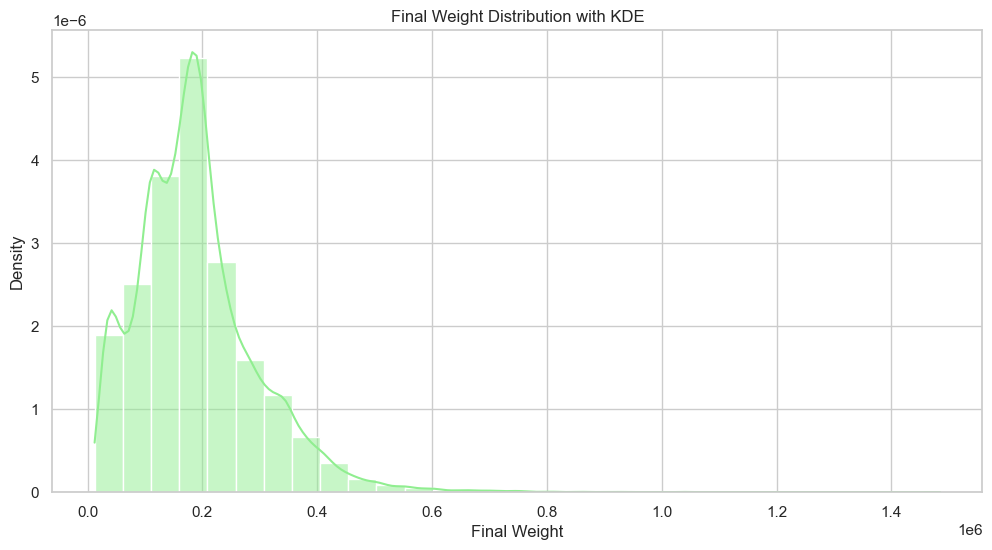

In [53]:
# Histogram and KDE for final_plot
plt.figure(figsize=(12, 6))
sns.histplot(data=data['final_weight'], bins=30, kde=True, color='lightgreen', stat="density")
plt.title('Final Weight Distribution with KDE')
plt.xlabel('Final Weight')
plt.ylabel('Density')
plt.show()

#### Box Plot

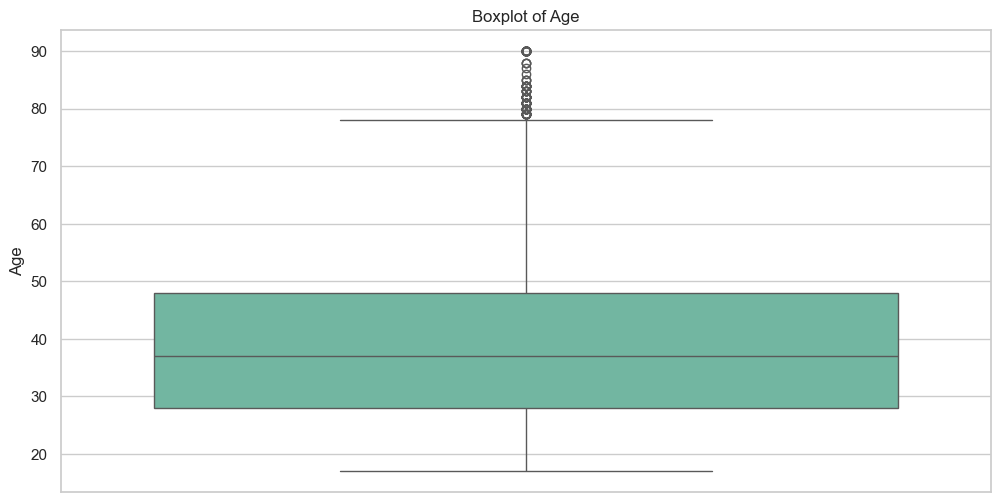

In [55]:
# Boxplot for Age
plt.figure(figsize=(12, 6))
sns.boxplot(y='age', data=data, palette='Set2')
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

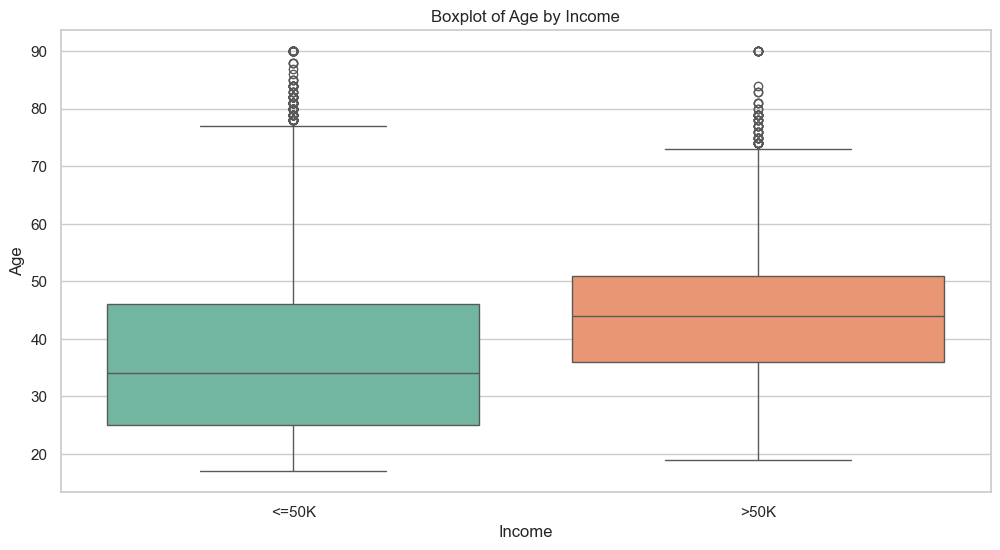

In [56]:
# Boxplot for Age by Income
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=data, palette='Set2')
plt.title('Boxplot of Age by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

### Q-Q Plot

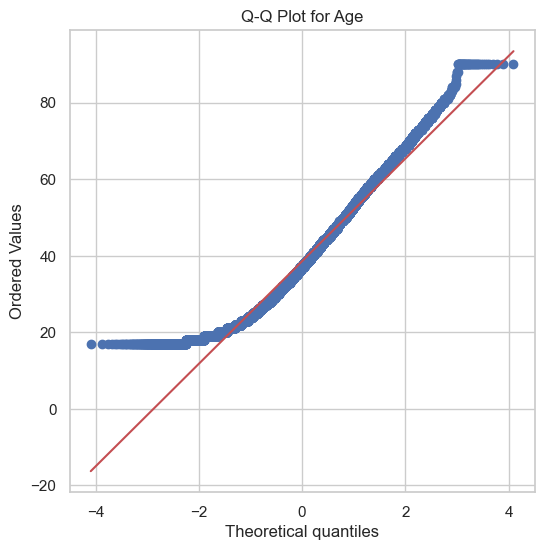

In [58]:
import scipy.stats as stats

# Q-Q Plot for Age
plt.figure(figsize=(6, 6))
stats.probplot(data['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Age')
plt.show()

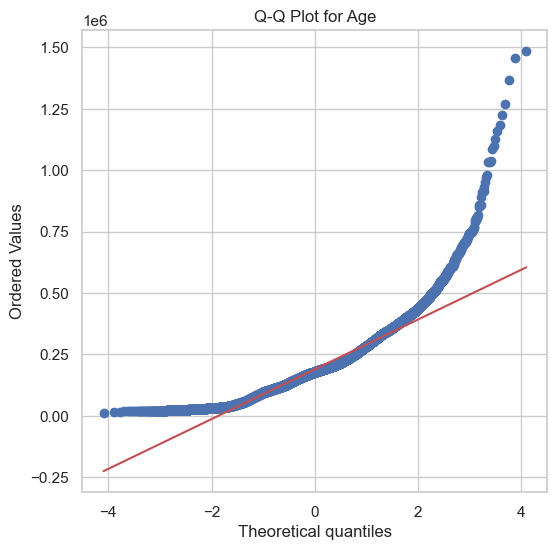

In [59]:
# Q-Q Plot for final_weight
plt.figure(figsize=(6, 6))
stats.probplot(data['final_weight'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Age')
plt.show()

### Violin Plot

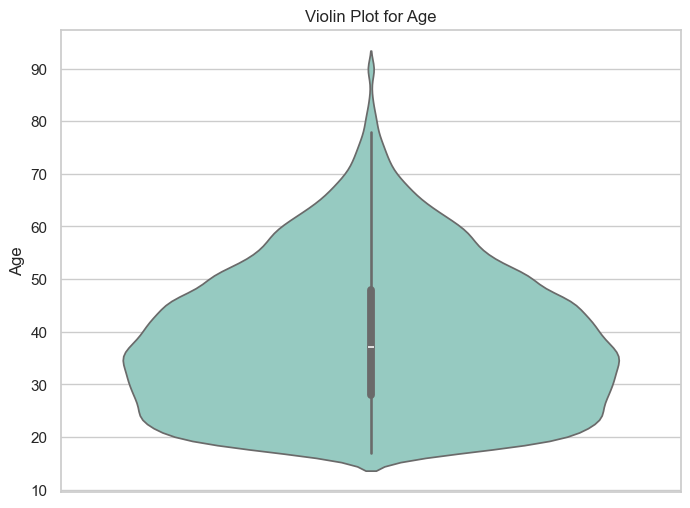

In [61]:
# Violin plot for 'age' variable
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['age'], palette='Set3')
plt.title('Violin Plot for Age')
plt.ylabel('Age')
plt.show()

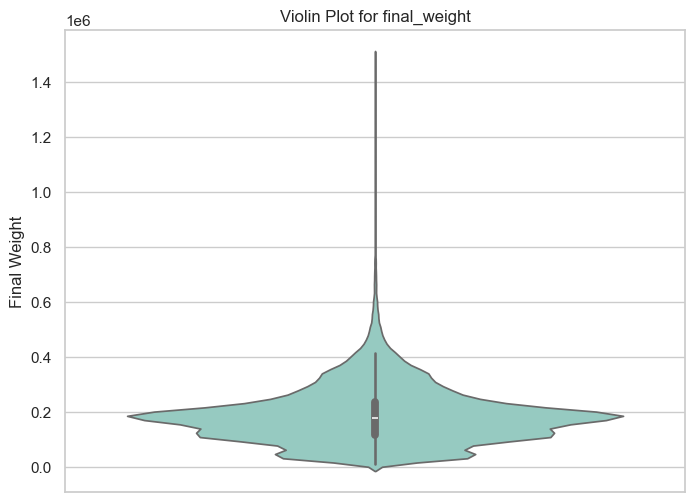

In [62]:
# Violin plot for 'final_weight' variable
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['final_weight'], palette='Set3')
plt.title('Violin Plot for final_weight')
plt.ylabel('Final Weight')
plt.show()

## 2. Bivariate Analysis

### i) Categorical and Categorical

#### Chi-Square Test

In [66]:
from scipy.stats import chi2_contingency

# Chi-Square Test for Workclass and Income
contingency_table = pd.crosstab(data['workclass'], data['income'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 922.3498477209453, p-value: 7.156800770833626e-195


#### Bar Chart

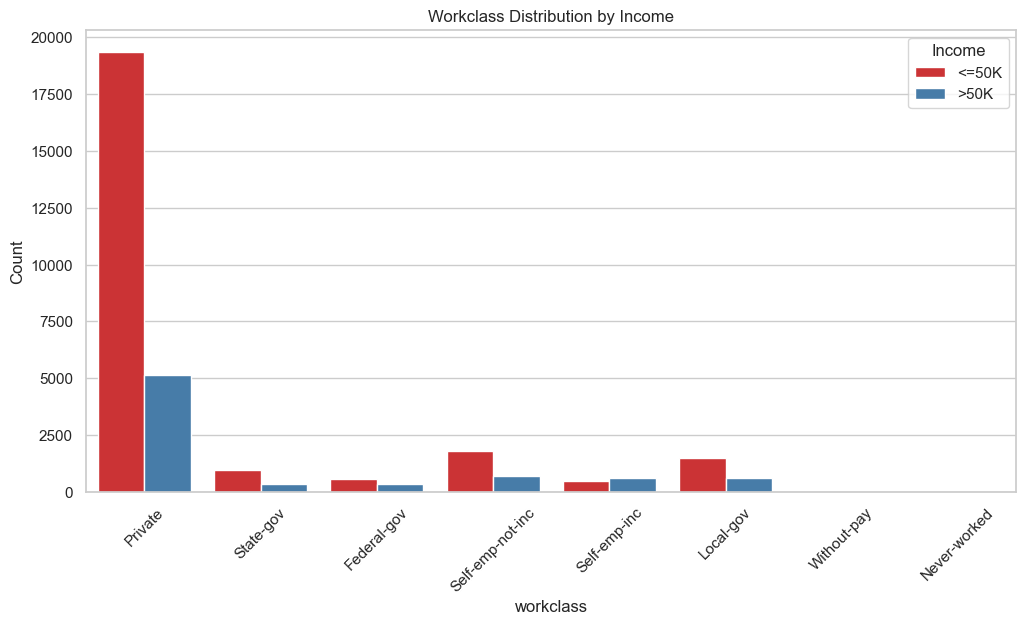

In [68]:
# Bar Chart of Workclass by Income
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='workclass', hue='income', palette='Set1')
plt.title('Workclass Distribution by Income')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

#### ii) Numerical and Numerical

#### Correlation

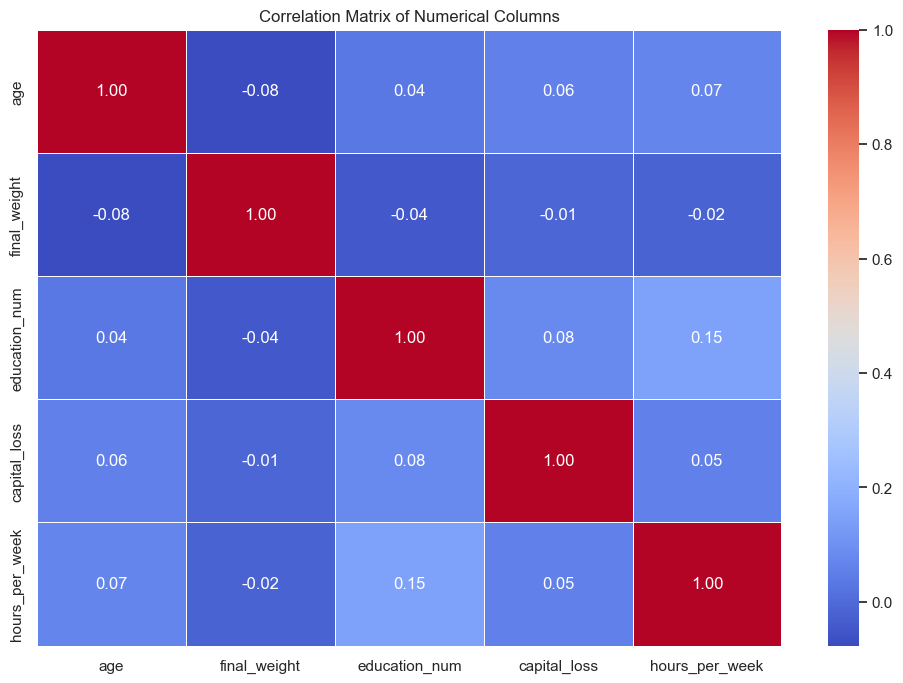

In [71]:
# Correlation Matrix
# Selecting only numerical columns for correlation
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

#### Scatter Plot

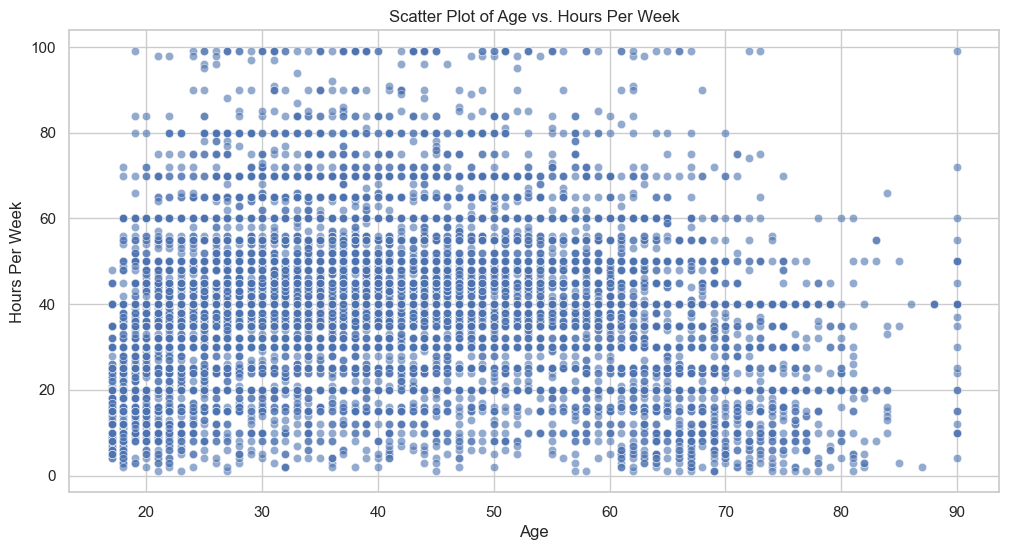

In [73]:
# Scatter Plot for Age and Hours Per Week
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hours_per_week', data=data, alpha=0.6)
plt.title('Scatter Plot of Age vs. Hours Per Week')
plt.xlabel('Age')
plt.ylabel('Hours Per Week')
plt.show()

### iii) Categorical and Numerical

#### Z-Test/ T-Test/ ANOVA

#### Z - Test

In [77]:
from scipy.stats import zscore

# Z-Test Example (Hypothetical)
# Assuming 'income' is binary and we want to compare ages
group1 = data[data['income'] == '<=50K']['age']
group2 = data[data['income'] == '>50K']['age']

# Calculate the Z-score
z_score = (group1.mean() - group2.mean()) / (data['age'].std() / (len(data) ** 0.5))
print(f"Z-Score: {z_score}")

Z-Score: -98.71497951846315


Conclusion:
The Z-score of -98.71 indicates a statistically significant difference between the average ages of the two income groups, with those earning `<=50K` being significantly younger than those earning `>50K`. This suggests that age has a strong correlation with income in the dataset.

#### T - Test

In [80]:
from scipy.stats import ttest_ind

# T-Test 
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-Statistic: {t_stat}, p-value: {p_value}")

T-Statistic: -43.42023078265856, p-value: 0.0


Conclusion:
The T-test result with a T-statistic of -43.42 and a p-value of 0.0 indicates a statistically significant difference in the average ages of the two income groups. This suggests that age strongly affects whether an individual earns `<=50K` or `>50K`.

#### ANOVA

In [83]:
from scipy.stats import f_oneway

# ANOVA Example 
anova_result = f_oneway(group1, group2)
print(f"F-Statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

F-Statistic: 1885.3164412193291, p-value: 0.0


Conclusion: 
The ANOVA result with an F-statistic of 1885.32 and a p-value of 0.0 indicates a statistically significant difference between the mean ages of the two income groups. This confirms that age has a strong influence on income levels (`<=50K` vs. `>50K`) in the dataset.

#### Bar Chart

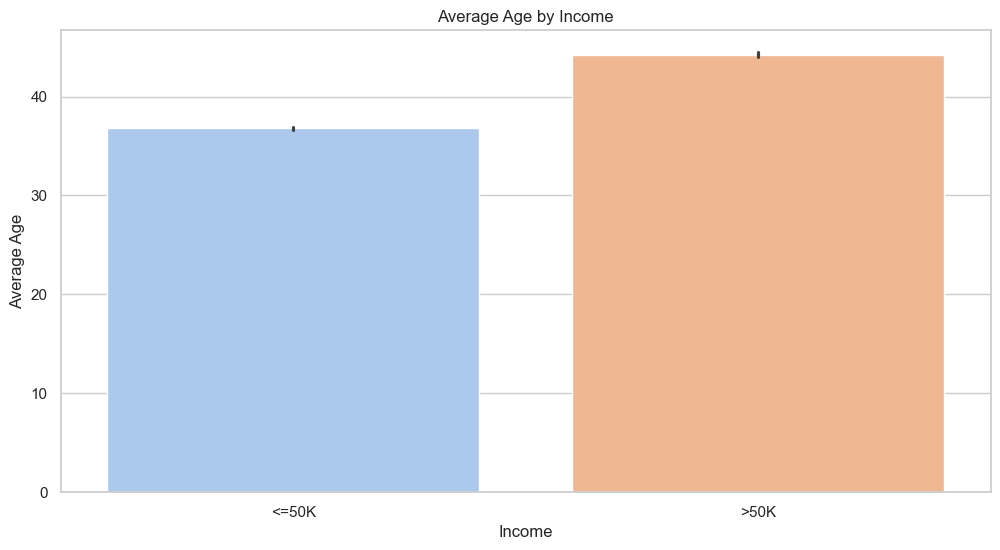

In [86]:
# Bar Chart of Average Age by Income
plt.figure(figsize=(12, 6))
sns.barplot(x='income', y='age', data=data, estimator=np.mean, palette='pastel')
plt.title('Average Age by Income')
plt.xlabel('Income')
plt.ylabel('Average Age')
plt.show()

#### Line Chart

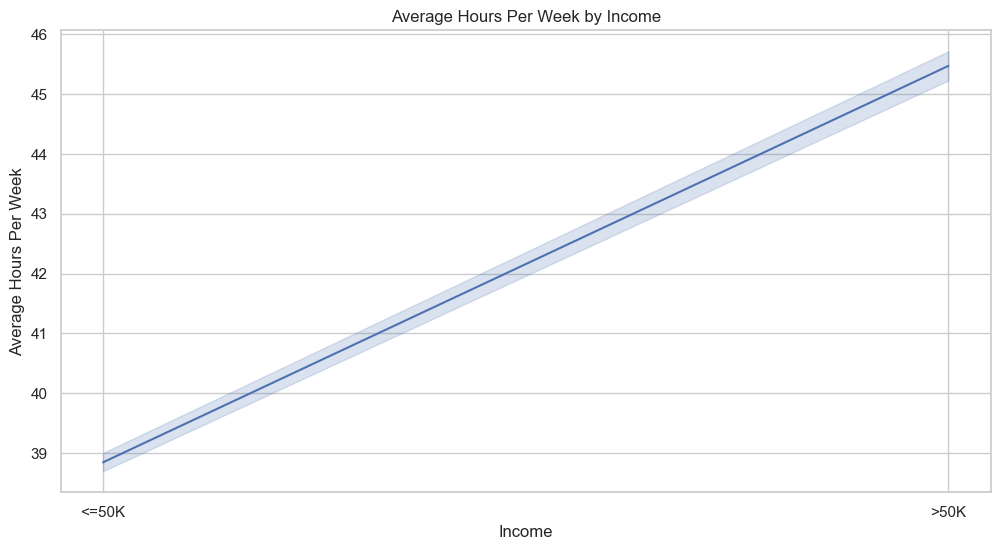

In [88]:
# Line Chart of Average Hours Per Week by Income
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='income', y='hours_per_week', estimator='mean', palette='muted')
plt.title('Average Hours Per Week by Income')
plt.xlabel('Income')
plt.ylabel('Average Hours Per Week')
plt.show()

### iv) KDE for Numerical vs Categorical

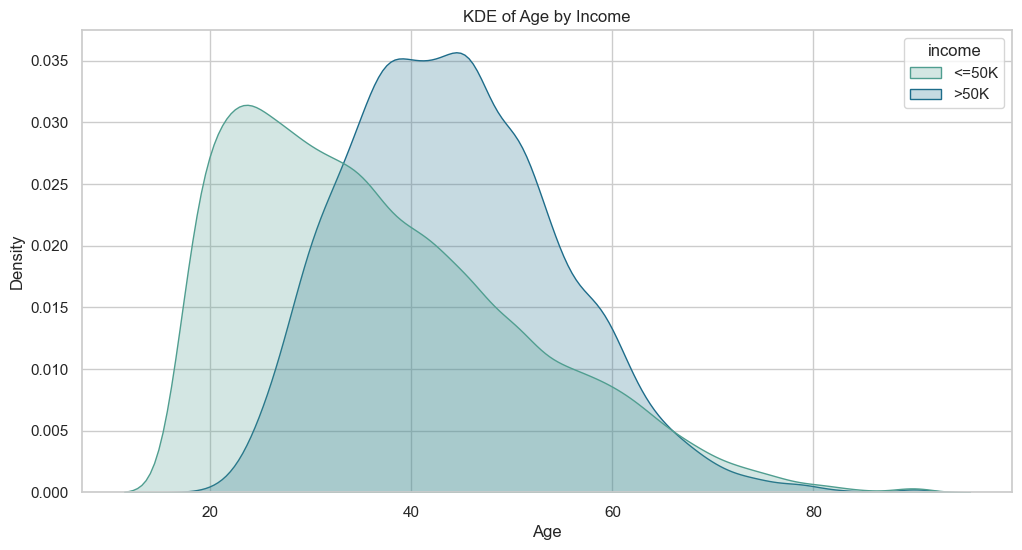

In [90]:
# KDE Plot of Age by Income
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='age', hue='income', fill=True, common_norm=False, palette='crest')
plt.title('KDE of Age by Income')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### Pair Plot

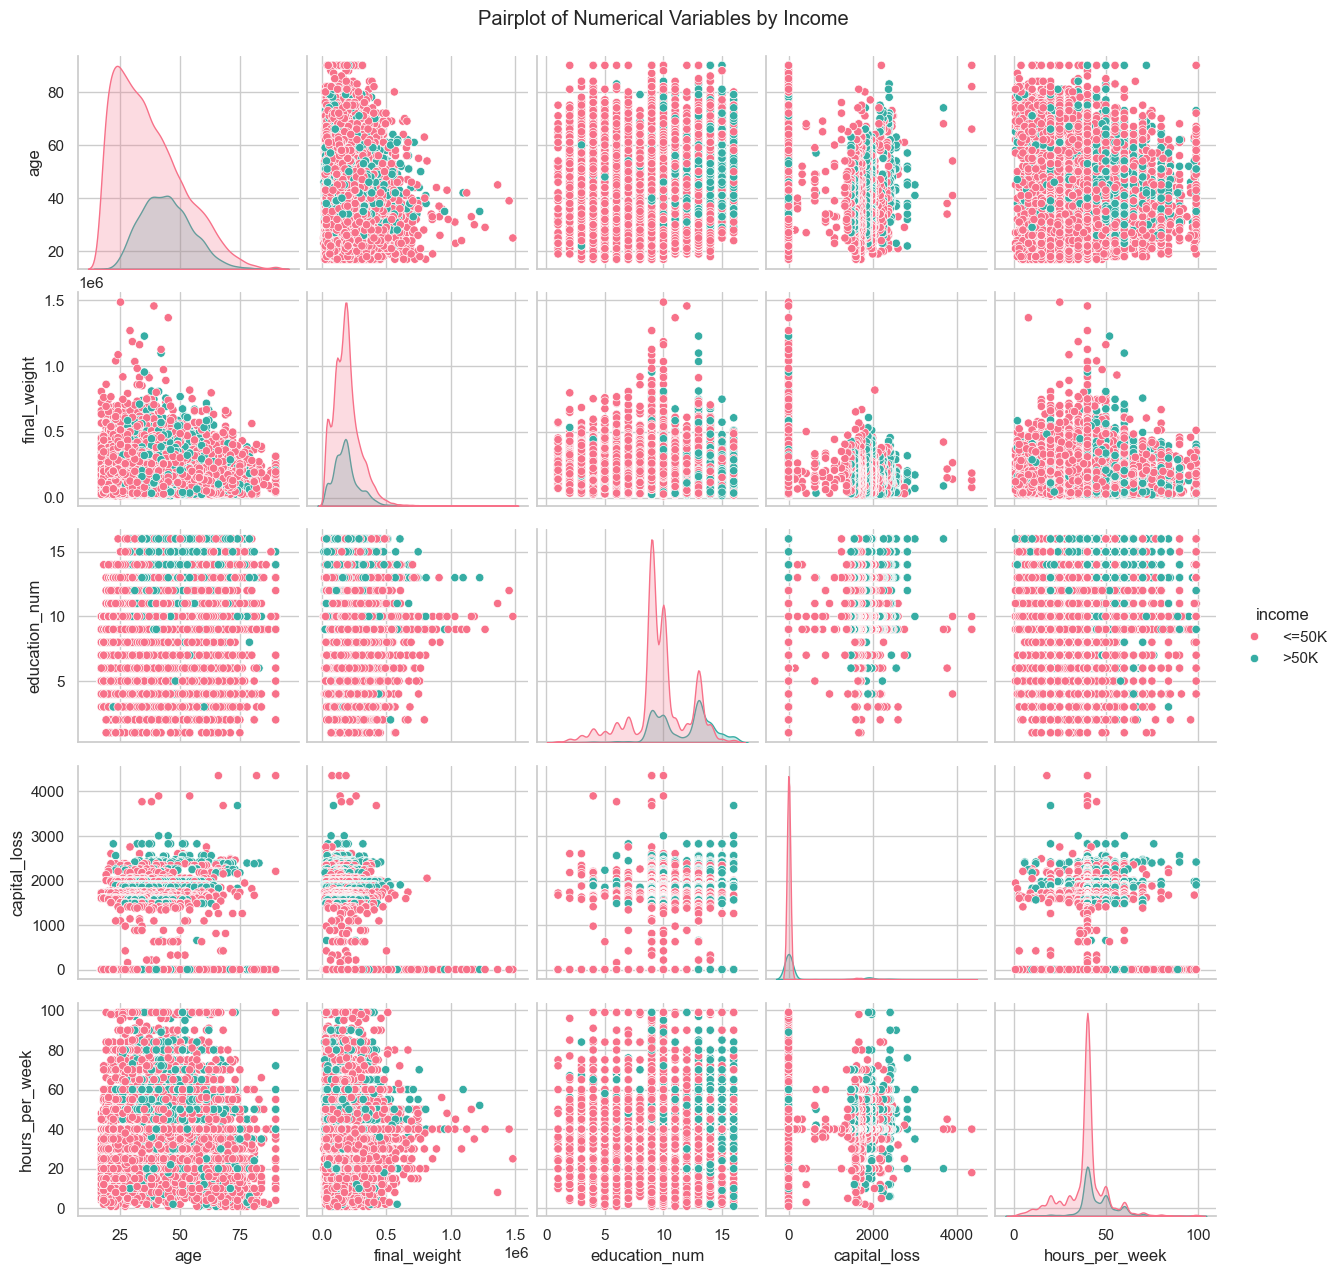

In [92]:
# Pairplot for Numerical Variables Colored by Income
sns.pairplot(data, hue='income', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables by Income', y=1.02)
plt.show()

# Conclusion

* Income disparity: A significant income gap exists, with a larger portion of individuals earning <=50K, highlighting potential economic inequalities.
* Age and income: There's a strong positive correlation between age and income, suggesting that older individuals generally earn more.
* Workclass matters: Workclass significantly influences income levels, with certain sectors associated with higher earning potential.
* Education's impact: Higher education levels are linked to higher income, emphasizing the importance of education for economic advancement.
* Hours and earnings: A positive relationship exists between hours worked and income, indicating that longer working hours often result in higher earnings.